# Homework 12
Author: Mao Nishino

In [58]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1
The file `map_24x32.csv` from Canvas is a 24 × 32 map of an environment,
with walls marked as negative numbers and a reward marked as 1. The entries with
non-negative values are the valid locations (states) for the agent position. The agent’s
actions are to move from a valid location to a valid adjacent location (left, right, up or
down).

###  (a)
Implement the value iteration algorithm for learning the optimal policy for this
map, with $γ = 0.9$. Initialize $V (s)$ with the given map values at all valid loca-
tions. Run the value iteration for a maximum of 50 epochs of going through all
states $s ∈ S$. Display the initial $V (s)$ and the obtained $V (s)$ every 5 epochs, as
grayscale images of size 24 ×32. (5 points)

In [73]:
# load map
map_ = pd.read_csv('map_24x32.csv', header = None)
map_ = np.array(map_)

# Define the state and the action space
S = [(i, j) for i in range(map_.shape[0]) for j in range(map_.shape[1])]
A = ['U', 'D', 'L', 'R']

def allowable_actions(state: tuple):
    """ Given a state, returns the allowalbe actions.
    Here, allowable means it stays inside the bounds.

    Args:

    state: tuple of int
        The state. It is an index (x,y) of on the map.
    
    Returns:

    actions: list
        The allowable actions at the state.
        
    """

    i, j = state

    # check if the state is valid
    if i < 0 or i >= map_.shape[0]: raise ValueError("First index out of bounds")
    if j < 0 or j >= map_.shape[1]: raise ValueError("Second index out of bounds")

    # Strategy: start from all actions and remove non-allowable actions
    actions = A.copy()

    # Remove out of the bounds action
    if i == 0: actions.remove('U')
    if i == map_.shape[0]-1: actions.remove('D')
    if j == 0: actions.remove('L')
    if j == map_.shape[1]-1: actions.remove('R')

    return actions

def acted_state(state: tuple, action: str):
    """ Given a state and a action, returns the state after the action.
    
    Args:
    
    state: tuple of int
        The current state. It is an index (x,y) of on the map.

    action: str
        The action being taken. It is an elemnet of A.
    

    Returns:

    acted_state: tuple of int
        The state after the action.
    """
    # Check if the action is allowable
    if action not in allowable_actions(state): 
        raise ValueError("action is not allowable")
    
    i, j = state

    if action == 'U': return (i-1, j)
    if action == 'D': return (i+1, j)
    if action == 'L': return (i, j-1)
    if action == 'R': return (i, j+1)
    
def reward(state: tuple, action: str):
    """ Returns the reward of doing the action at the state.

    Args:
    
    state: tuple of float
        The current state. It is an index (x,y) of on the map.

    action: str
        The action being taken. It is an elemnet of A.
    
    Returns:

    reward: float
        The reward.

    """
    return map_[acted_state(state, action)]    

# main loop
MAX_ITER = 50
GAMMA = 0.9
# Initialize V
v = np.zeros_like(map_).astype(float)
# We need to initialize as float. Otherwise, it automatically becomes an int array.
# That is bad because substituting a float value to int automatically rounds it.
v_old = map_
vs = [map_]

for i in range(MAX_ITER):
    for state in S:
        q = []
        for action in allowable_actions(state):
            q.append(reward(state, action) + GAMMA*v_old[acted_state(state, action)])
        v[state] = max(q)
    v_old = v
    if (i+1) % 5 == 0:
        vs.append(v.copy()) # We need to copy because otherwise modificaiton of v changes all v in vs.

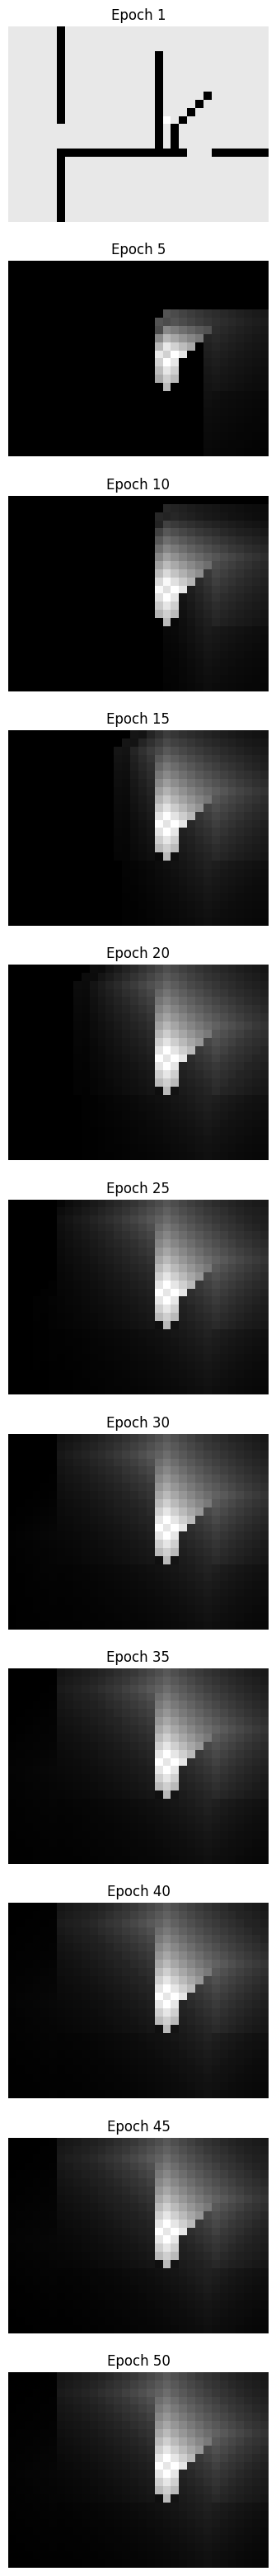

In [70]:
# plot V(s)
mult = 10

fig, axs = plt.subplots(len(vs), 1, figsize = (len(vs)*3*mult, 4*mult))
for epoch, i, v_ in zip([1]+list(range(5,51,5)), range(len(vs)), vs):
    axs[i].title.set_text(f'Epoch {epoch}')
    axs[i].imshow(v_, cmap = 'gray')
    axs[i].axis('off')
plt.show()

# (b)
Display the final learned policy as a table with the actions at each valid location
encoded as L,R,U,D as left, right, up and down respectively.

In [71]:
def optimal_policy(state: tuple, v_: np.ndarray):
    """ The optimal policy function.

    Args:
    
    state: tuple
        The state that we want an action at.

    v: np.ndarray
        The optimal V array.

    Returns:
    
    action: str
        The action to be taken at the state.
    """
    q = []
    for action in allowable_actions(state):
        q.append(reward(state, action) + GAMMA*v_[acted_state(state, action)])
    tmp_max = max(q)
    return allowable_actions(state)[q.index(tmp_max)]

opt_policy = pd.DataFrame(np.zeros_like(map_), index=range(map_.shape[0]), columns=range(map_.shape[1]))

for i in range(map_.shape[0]):
    for j in range(map_.shape[1]):
        state = (i, j)
        opt_policy.at[i, j] = optimal_policy(state, vs[-1]) 
        if map_[state] <0 : opt_policy.at[i,j] = ''
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

opt_policy

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,D,D,D,D,D,D,,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D
1,D,D,D,D,D,D,,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D
2,D,D,D,D,D,D,,R,R,R,R,R,R,R,R,R,R,R,R,D,D,D,D,D,D,D,D,D,D,D,D,D
3,D,D,D,D,D,D,,R,R,R,R,R,R,R,R,R,R,U,,D,D,D,D,D,D,D,D,D,D,D,D,D
4,D,D,D,D,D,D,,R,R,R,R,R,R,R,R,R,R,U,,D,D,D,D,D,D,D,D,D,D,D,D,D
5,D,D,D,D,D,D,,R,R,R,R,R,R,R,R,R,R,U,,D,D,D,D,D,D,D,D,D,D,D,D,D
6,D,D,D,D,D,D,,R,R,R,R,R,R,R,R,R,R,U,,D,D,D,D,D,D,D,D,D,D,D,D,D
7,D,D,D,D,D,D,,R,R,R,R,R,R,R,R,R,R,U,,D,D,D,D,D,L,L,L,L,L,L,L,L
8,D,D,D,D,D,D,,R,R,R,R,R,R,R,R,R,R,U,,D,D,D,D,L,,U,U,U,U,U,U,U
9,D,D,D,D,D,D,,R,R,R,R,R,R,R,R,R,R,U,,D,D,D,L,,R,U,U,U,U,U,U,U
